# Value At Risk Using Variance - Covariance Method

VaR is a measure of Risk of Loss for investment

The method I am Using here is Variance-covariance method: 
The variance-covariance method for the value at risk calculates the standard deviation of price movements of an investment or security.

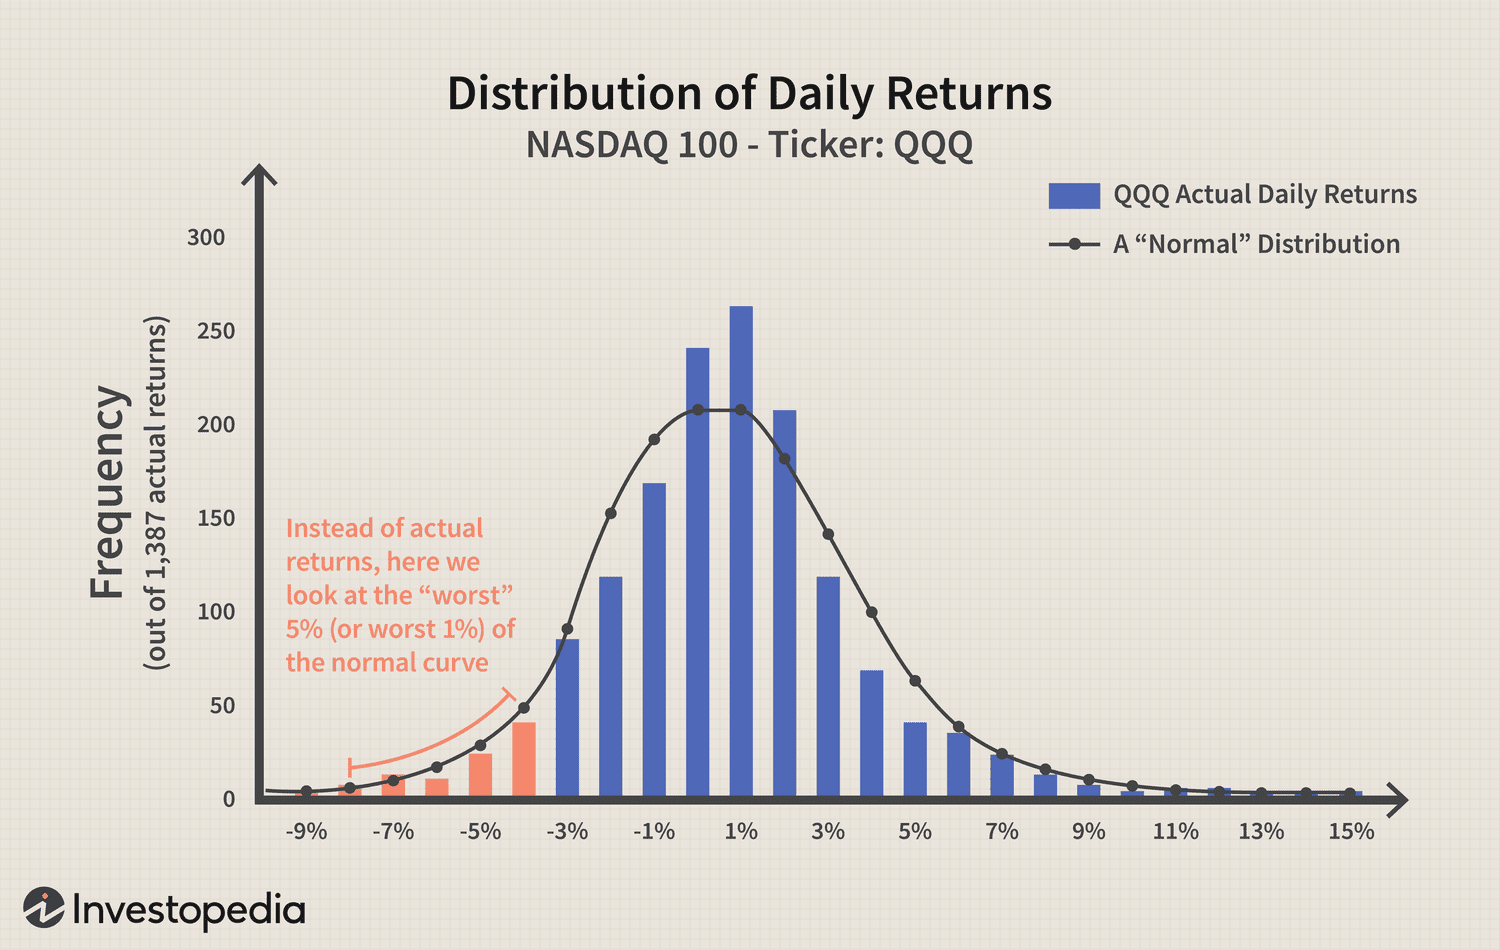


Firstly, We'll Import all the necessary libraries

In [62]:
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm

Next, We'll setup the list of stock tickers and their corresponding weights.
I've taken Apple (AAPL), Meta Platforms (META), Citigroup (C), Disney (DIS), Ford (F), Microsoft (MSFT), Morgan Stanley (MS), GameStop (GME), Tesla (TSLA), and Amazon (AMZN) for evaluation and equally weighted them to 0.1.

In [ ]:
tickers = ['AAPL','META', 'C', 'DIS','F','MSFT','MS','GME','TSLA','AMZN']
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [48]:
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

df = yf.download(tickers,start,end)['Adj Close']
df

[*********************100%%**********************]  10 of 10 completed


,AAPL,AMZN,C,DIS,F,GME,META,MS,MSFT,TSLA
Date,,,,,,,,,,
2020-01-02,73.249031,94.900497,70.525856,148.199997,8.202949,1.577500,209.779999,46.449238,155.093689,28.684000
2020-01-03,72.536903,93.748497,69.197456,146.500000,8.020078,1.470000,208.669998,45.699486,153.162476,29.534000
2020-01-06,73.114876,95.143997,68.980423,145.649994,7.976539,1.462500,212.600006,45.538830,153.558395,30.102667
2020-01-07,72.771034,95.343002,68.381340,145.699997,8.054910,1.380000,213.059998,45.449570,152.158279,31.270666
2020-01-08,73.941643,94.598503,68.902290,145.399994,8.054910,1.430000,215.220001,46.029736,154.581909,32.809334
...,...,...,...,...,...,...,...,...,...,...
2023-09-11,179.360001,143.100006,40.590000,82.519997,12.220000,17.020000,307.559998,83.510002,337.940002,273.579987
2023-09-12,176.300003,141.229996,41.680000,83.680000,12.450000,17.230000,301.660004,85.550003,331.769989,267.480011
2023-09-13,174.210007,144.850006,42.369999,83.480003,12.640000,17.809999,305.059998,87.250000,336.059998,271.299988


In [49]:
returns = df.pct_change()
returns

,AAPL,AMZN,C,DIS,F,GME,META,MS,MSFT,TSLA
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.018836,-0.011471,-0.022293,-0.068146,-0.005291,-0.016141,-0.012452,0.029633
2020-01-06,0.007968,0.014886,-0.003136,-0.005802,-0.005429,-0.005102,0.018834,-0.003515,0.002585,0.019255
2020-01-07,-0.004703,0.002092,-0.008685,0.000343,0.009825,-0.056410,0.002164,-0.001960,-0.009118,0.038801
2020-01-08,0.016086,-0.007809,0.007618,-0.002059,0.000000,0.036232,0.010138,0.012765,0.015928,0.049205
...,...,...,...,...,...,...,...,...,...,...
2023-09-11,0.006623,0.035231,0.000000,0.011522,-0.006504,-0.038961,0.032462,-0.016604,0.010979,0.100925
2023-09-12,-0.017061,-0.013068,0.026854,0.014057,0.018822,0.012338,-0.019183,0.024428,-0.018258,-0.022297
2023-09-13,-0.011855,0.025632,0.016555,-0.002390,0.015261,0.033662,0.011271,0.019871,0.012931,0.014281


In [50]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,AMZN,C,DIS,F,GME,META,MS,MSFT,TSLA
AAPL,0.000474,0.000329,0.000267,0.000247,0.000265,0.000370,0.000400,0.000285,0.000358,0.000492
AMZN,0.000329,0.000580,0.000187,0.000247,0.000208,0.000309,0.000445,0.000205,0.000348,0.000487
C,0.000267,0.000187,0.000729,0.000393,0.000482,0.000466,0.000287,0.000538,0.000254,0.000363
DIS,0.000247,0.000247,0.000393,0.000526,0.000371,0.000307,0.000303,0.000353,0.000251,0.000356
F,0.000265,0.000208,0.000482,0.000371,0.000875,0.000586,0.000280,0.000435,0.000240,0.000476
GME,0.000370,0.000309,0.000466,0.000307,0.000586,0.010837,0.000326,0.000319,0.000283,0.000839
META,0.000400,0.000445,0.000287,0.000303,0.000280,0.000326,0.000915,0.000292,0.000401,0.000486
MS,0.000285,0.000205,0.000538,0.000353,0.000435,0.000319,0.000292,0.000584,0.000278,0.000347
MSFT,0.000358,0.000348,0.000254,0.000251,0.000240,0.000283,0.000401,0.000278,0.000443,0.000443
TSLA,0.000492,0.000487,0.000363,0.000356,0.000476,0.000839,0.000486,0.000347,0.000443,0.001924


In [51]:
avg_returns = returns.mean()
avg_returns

AAPL    0.001172
AMZN    0.000710
C      -0.000173
DIS    -0.000327
F       0.000896
GME     0.007174
META    0.000851
MS      0.000980
MSFT    0.001032
TSLA    0.003387
dtype: float64

In [53]:
count = returns.count()[0]
count

/tmp/ipykernel_68249/3364445099.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = returns.count()[0]


932

In [56]:
port_mean = avg_returns @ weights
port_std = np.sqrt(weight.T @ cov_matrix @ weights)

In [57]:
port_mean

0.0015702712119784758

In [58]:
port_std

0.022427190000359677

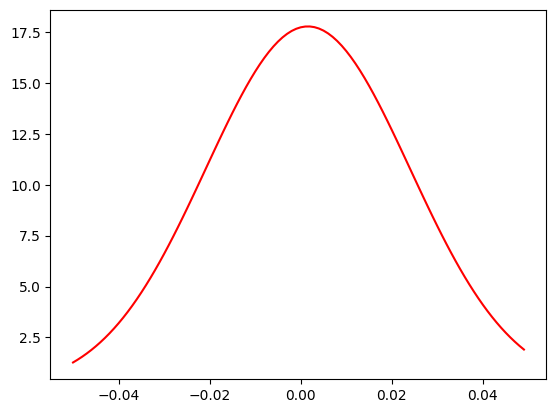

In [63]:
x = np.arange(-0.05,0.05,0.001)
norm_dist = norm.pdf(x,port_mean,port_std)

plt.plot(x,norm_dist,color = 'r')
plt.show()

In [64]:
confidence_level = 0.05

VaR = norm.ppf(confidence_level , port_mean , port_std)
VaR

-0.035319173602442945

In [65]:
num_days = 5
VaR*np.sqrt(num_days)

-0.07897607308417856

In [67]:
lower = port_mean - 2*port_std/np.sqrt(count)
higher = port_mean + 2*port_std / np.sqrt(count)

In [69]:
print(f"({lower}, {higher})")


(0.00010101714396929863, 0.0030395252799876532)
